In [90]:
import numpy as np
import pandas
import pylab as plt  # matplotlib的一个子包
from pywt import wavedec          # wavelets
from utils import eemd_tools
from utils.constants import const

# 导入数据

In [91]:
filename = const.PROJECT_DIR + "data/apple_interpolate.csv"
dataset = eemd_tools.load_data_to_signal(filename)
times = np.arange(len(dataset))  # or dataset.shape[0]
print("s's shape: ", dataset.shape)
print("t's lenth: ", times.shape)
print(dataset)
print(times)

s's shape:  (1901,)
t's lenth:  (1901,)
[10.71 10.71 10.71 ...  9.5   9.5   9.5 ]
[   0    1    2 ... 1898 1899 1900]


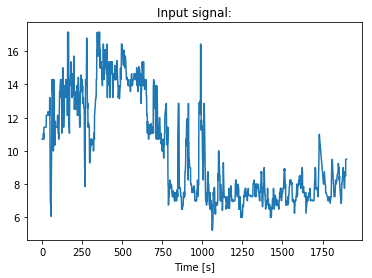

In [92]:
# Plot original series
plt.plot(times, dataset)
plt.title("Input signal:")
plt.xlabel("Time [s]")
plt.show()

# Wavelets

In [93]:
# fix random seed for reproducibility
np.random.seed(7)

coeffs = wavedec(dataset, 'db3', 'smooth', level=2)
cA2, cD2, cD1 = coeffs
print("# len: ", len(cA2))
print("# len: ", len(cD2))
print("# len: ", len(cD1))

# len:  479
# len:  479
# len:  953


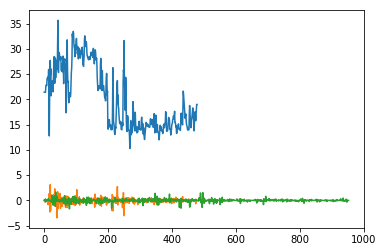

In [94]:
plt.plot(cA2)
plt.plot(cD2)
plt.plot(cD1)
plt.show()

In [95]:
# ans = pywt.waverec(coeffs, 'db3')

n = len(dataset)
rcA2 = pywt.upcoef('a', cA2, 'db3', level=2, take=n)
rcD2 = pywt.upcoef('d', cD2, 'db3', level=2, take=n)
rcD1 = pywt.upcoef('d', cD1, 'db3', level=2, take=n)
print("# len: ", len(rcA2))
print("# len: ", len(rcD2))
print("# len: ", len(rcD1))

# len:  1901
# len:  1901
# len:  1901


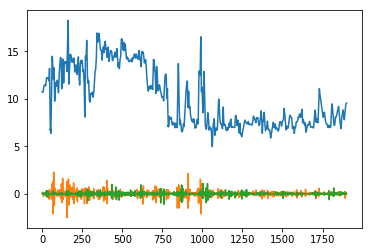

In [96]:
plt.plot(rcA2)
plt.plot(rcD2)
plt.plot(rcD1)
plt.show()

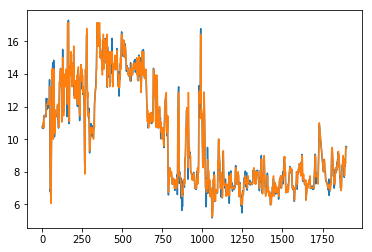

In [97]:
plt.plot(rcA2 + rcD2 + rcD1)
plt.plot(dataset)
plt.show()

## 保存文件

In [98]:
print(dataset.shape)
print(rcA2.shape)

train_re = np.vstack((dataset, rcA2, rcD2, rcD1)) 
train_re = train_re.T
print(train_re.shape)
print(train_re[0:5, :])
print(train_re[-5:, :])

np.save(const.DATA_DIR + "waveletes/apple_multi.npy", train_re) 

(1901,)
(1901,)
(1901, 4)
[[ 1.0710000e+01  1.0709518e+01  4.7990252e-04  5.4881468e-02]
 [ 1.0710000e+01  1.0706137e+01  3.8607439e-03  2.8725415e-02]
 [ 1.0710000e+01  1.0701798e+01  8.1998222e-03 -7.8035025e-03]
 [ 1.0710000e+01  1.0701100e+01 -1.3341468e-03 -1.4033170e-02]
 [ 1.0710000e+01  1.0701551e+01 -1.6372994e-02 -2.6770635e-02]]
[[ 9.5         9.386943    0.10473949  0.06789714]
 [ 9.5         9.468367    0.06005594  0.02704637]
 [ 9.5         9.531528   -0.04324872 -0.04081094]
 [ 9.5         9.550419   -0.05042005 -0.01997424]
 [ 9.5         9.543029   -0.04303063  0.01449293]]
